# GEOG 5160 6160 Lab 09

Let's begin by importing the packages we'll need for the lab:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

In [2]:
gap_df = pd.read_csv("../datafiles/gapminder_1800_2018.csv")
gap_df.shape

(58695, 8)

In [3]:
gap_df.head()

,country,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population
0,Afghanistan,1800,469.0,7.0,NaN,603.0,28.2,3280000
1,Afghanistan,1801,469.0,7.0,NaN,603.0,28.2,3280000
2,Afghanistan,1802,469.0,7.0,NaN,603.0,28.2,3280000
3,Afghanistan,1803,469.0,7.0,NaN,603.0,28.2,3280000
4,Afghanistan,1804,469.0,7.0,NaN,603.0,28.2,3280000


<AxesSubplot:xlabel='child_mortality', ylabel='Count'>

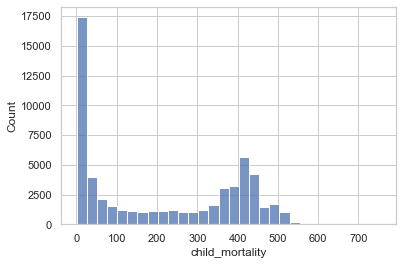

In [4]:
sns.histplot(data=gap_df, x="child_mortality", bins=30)

<AxesSubplot:xlabel='fertility', ylabel='Count'>

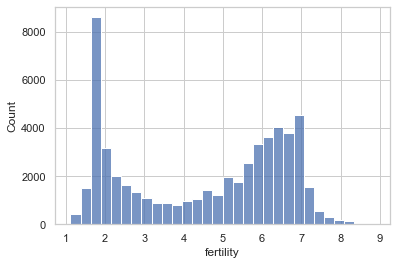

In [5]:
sns.histplot(data=gap_df, x="fertility", bins=30)

<AxesSubplot:xlabel='per_cap_co2', ylabel='Count'>

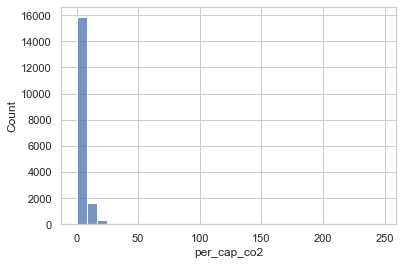

In [6]:
sns.histplot(data=gap_df, x="per_cap_co2", bins=30)

<AxesSubplot:xlabel='income', ylabel='Count'>

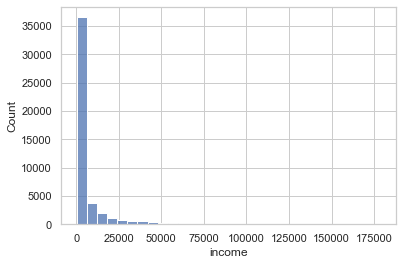

In [7]:
sns.histplot(data=gap_df, x="income", bins=30)

<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

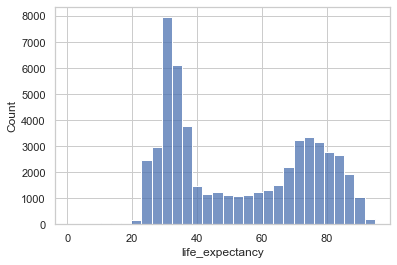

In [8]:
sns.histplot(data=gap_df, x="life_expectancy", bins=30)

<AxesSubplot:xlabel='population', ylabel='Count'>

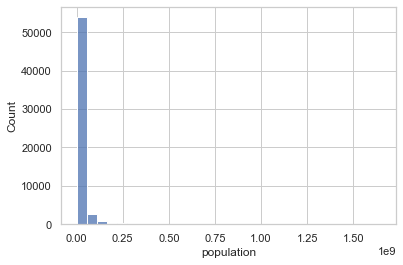

In [9]:
sns.histplot(data=gap_df, x="population", bins=30)

In [10]:
gap_df = gap_df.dropna()

In [11]:
gap_df_scale = gap_df[gap_df["per_cap_co2"] > 0]

In [12]:
gap_df.shape

(17737, 8)

In [13]:
cols = ["child_mortality", "fertility", "per_cap_co2", 
        "income", "life_expectancy", "population"]

In [14]:
for col in cols:
    gap_df_scale[col] = np.log(gap_df_scale[col])
    gap_df_scale[col] = (gap_df_scale[col] - gap_df_scale[col].mean())/gap_df_scale[col].std()

<ipython-input-14-4f56028a90bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_df_scale[col] = np.log(gap_df_scale[col])
<ipython-input-14-4f56028a90bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_df_scale[col] = (gap_df_scale[col] - gap_df_scale[col].mean())/gap_df_scale[col].std()


In [15]:
gap_df_scale.describe()

,year,child_mortality,fertility,per_cap_co2,income,life_expectancy,population
count,17676.000000,1.767600e+04,1.767600e+04,1.767600e+04,1.767600e+04,1.767600e+04,1.767600e+04
mean,1958.988572,5.748337e-16,2.251097e-17,2.572682e-17,6.238755e-16,1.881274e-16,1.003346e-15
std,45.969689,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1800.000000,-3.081631e+00,-2.539307e+00,-4.556951e+00,-2.347217e+00,-8.299730e+00,-3.016228e+00
25%,1935.000000,-7.273651e-01,-8.185993e-01,-6.579271e-01,-7.369487e-01,-6.842808e-01,-5.381645e-01
50%,1970.000000,2.277006e-01,2.839114e-01,1.109823e-01,-1.193879e-01,2.542653e-01,2.198329e-02
75%,1994.000000,8.551855e-01,8.647610e-01,7.982361e-01,6.857548e-01,8.360962e-01,6.364680e-01
max,2018.000000,1.552980e+00,1.577167e+00,2.741626e+00,3.250036e+00,1.459600e+00,3.113488e+00


In [16]:
gap_df_scale2 = gap_df_scale[gap_df_scale.year == 2018]

In [17]:
X = gap_df_scale2[cols].values

## $k$-means clustering

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=6, n_init=10, random_state=42)

In [19]:
kmeans.fit(X)

KMeans(init='random', n_clusters=6, random_state=42)

In [20]:
kmeans.n_iter_

10

In [21]:
labels = kmeans.labels_
print(labels)

[0 5 1 0 2 1 5 3 3 5 2 2 1 2 3 3 4 0 4 5 2 5 1 2 3 0 0 5 0 3 4 0 0 3 1 1 4
 0 0 5 0 3 5 2 3 3 4 5 5 1 5 4 0 2 4 0 4 3 3 4 0 5 3 0 3 2 5 0 0 4 0 5 3 2
 1 1 1 1 3 3 3 5 3 5 3 0 4 3 5 5 2 5 4 0 5 3 2 0 0 3 2 0 2 0 2 1 4 5 5 2 5
 0 5 4 5 3 3 5 0 0 5 2 3 3 0 4 5 0 5 1 1 3 3 3 3 1 0 4 4 3 0 3 2 0 3 3 3 4
 0 1 3 0 3 5 2 2 0 2 3 3 5 0 0 1 4 0 4 2 5 1 5 0 1 3 3 1 2 5 4 1 1 0 0 0]


In [22]:
counts = np.bincount(labels)
print(counts)

[42 22 23 42 21 34]


In [23]:
pd.DataFrame({"cluster": np.arange(0,6), "counts": counts})

,cluster,counts
0,0,42
1,1,22
2,2,23
3,3,42
4,4,21
5,5,34


In [24]:
centers = kmeans.cluster_centers_

In [25]:
pd.DataFrame(centers, columns = cols)

,child_mortality,fertility,per_cap_co2,income,life_expectancy,population
0,-0.213540,0.250832,-0.561977,-0.674256,0.540638,0.651507
1,-1.327011,-1.263568,0.718586,0.969633,1.052101,1.664876
2,-1.914002,-1.654313,0.921076,1.482419,1.140131,-1.247824
3,-2.343229,-1.709125,1.106859,1.883009,1.263321,0.476111
4,-0.754644,-0.414313,0.127154,0.184372,0.763327,-1.188226
5,-1.251867,-1.179543,0.416380,0.536267,1.012916,0.282379


In [26]:
import geopandas as gpd
borders = gpd.read_file("../datafiles/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")
borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
borders.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [28]:
gap_df_scale2 = gap_df_scale2.assign(kmeans = labels)

In [29]:
import country_converter as coco

In [30]:
gap_iso3 = coco.convert(names=gap_df_scale2.country, to='ISO3', not_found=None)

In [31]:
gap_df_scale2 = gap_df_scale2.assign(ISO_A3 = gap_iso3)

In [32]:
borders2 = borders.merge(gap_df_scale2, on='ISO_A3')

<AxesSubplot:>

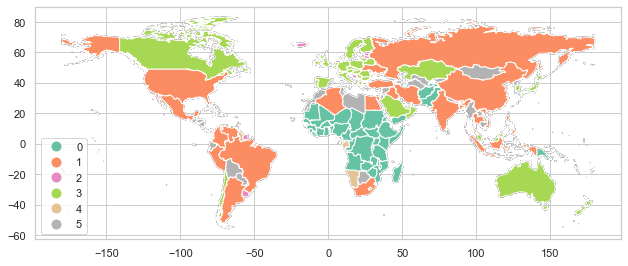

In [33]:
base = borders2.plot(figsize = (10.5, 6.5), edgecolor="black", facecolor="None")
borders2.plot(ax = base, column = 'kmeans', categorical=True, 
             cmap = 'Set2', legend = True, legend_kwds={'loc': 'lower left'})

In [57]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [58]:
hclust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hclust = hclust.fit(X)

In [59]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

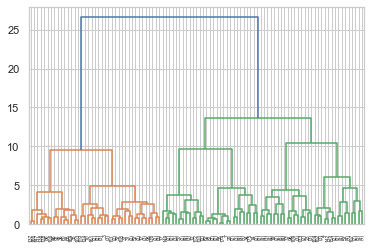

In [60]:
plot_dendrogram(hclust, truncate_mode='level', p=6)

In [62]:
hclust = AgglomerativeClustering(n_clusters = 6)
hclust.fit_predict(X)

array([2, 0, 4, 2, 0, 1, 0, 1, 3, 0, 0, 3, 4, 0, 3, 3, 0, 2, 0, 4, 3, 0,
       1, 3, 3, 2, 2, 4, 2, 1, 0, 2, 2, 1, 1, 1, 5, 2, 5, 0, 2, 3, 3, 3,
       3, 3, 5, 0, 0, 4, 4, 0, 2, 3, 0, 2, 0, 3, 1, 0, 5, 0, 1, 2, 3, 0,
       4, 2, 5, 0, 2, 4, 3, 3, 1, 1, 1, 4, 3, 3, 1, 0, 1, 4, 3, 2, 5, 3,
       4, 4, 3, 3, 5, 2, 0, 3, 3, 2, 2, 1, 0, 2, 0, 5, 0, 1, 5, 0, 0, 3,
       4, 2, 4, 0, 4, 3, 3, 4, 2, 2, 4, 0, 3, 3, 2, 4, 0, 2, 0, 1, 4, 1,
       3, 3, 1, 1, 2, 5, 5, 3, 2, 3, 0, 2, 3, 3, 3, 5, 2, 4, 1, 2, 1, 1,
       0, 0, 2, 0, 3, 3, 4, 2, 2, 1, 5, 2, 5, 3, 0, 1, 0, 2, 1, 3, 1, 1,
       0, 4, 5, 4, 4, 2, 2, 2])

In [63]:
gap_df_scale2 = gap_df_scale2.assign(hclust = hclust.fit_predict(X))

In [ ]:
borders2 = borders.merge(gap_df_scale2, on='ISO_A3')
base = borders2.plot(figsize = (10.5, 6.5), edgecolor="black", facecolor="None")
borders2.plot(ax = base, column = 'hclust', categorical=True, 
             cmap = 'Set2', legend = True, legend_kwds={'loc': 'lower left'})